In [59]:
!pip install pandas requests beautifulsoup4 yfinance lxml
# optionnel : !pip install alpha_vantage

In [60]:
import yfinance as yf
import pandas as pd


In [61]:
ticker = "AAPL"


In [62]:
# Dates de début et fin
start_date = "2020-01-01"
end_date = "2025-11-02"  # tu peux mettre "today" aussi

In [63]:
data = yf.download(ticker, start=start_date, end=end_date, interval="1d", auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [72]:
# Vérifier
print(data.head())
print(data.tail())

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.538513  72.598892  71.292304  71.545890  135480400
2020-01-03  71.833275  72.594040  71.608669  71.765651  146322800
2020-01-06  72.405670  72.444313  70.703005  70.954181  118387200
2020-01-07  72.065147  72.671341  71.845369  72.415337  108872000
2020-01-08  73.224419  73.526310  71.768094  71.768094  132079200
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-10-27  268.809998  269.119995  264.649994  264.880005  44888200
2025-10-28  269.000000  269.890015  268.149994  268.989990  41534800
2025-10-29  269.700012  271.410004  267.109985  269.279999  51086700
2025-10-30  271.399994  274.140015  268.480011  271.989990

In [65]:
data.to_csv(f"{ticker}_2020_2025.csv")

In [66]:
import numpy as np

In [75]:
import yfinance as yf
import pandas as pd
import numpy as np

ticker = "AAPL"  # Assurez-vous que c'est bien le ticker Apple
start_date = "2020-01-01"
end_date = "2025-11-02"

df = yf.download(ticker, start=start_date, end=end_date, interval="1d", auto_adjust=True)

if df.empty:
    print("Erreur : le DataFrame est vide. Vérifie le ticker ou la période.")
else:
    # Nettoyage et indicateurs
    df.fillna(method="ffill", inplace=True)
    df.fillna(method="bfill", inplace=True)
    df = df[~df.index.duplicated(keep='first')]

    df['Return'] = df['Close'].pct_change()
    df['Cumulative Return'] = (1 + df['Return']).cumprod() - 1
    df['MA20'] = df['Close'].rolling(20).mean()
    df['MA50'] = df['Close'].rolling(50).mean()
    df['Volatility'] = df['Return'].rolling(20).std() * np.sqrt(252)
    df.dropna(inplace=True)

    df.to_csv(f"{ticker}_cleaned_2020_2025.csv")
    print(f"{ticker} sauvegardé avec succès !")
    print(df.head())
    print(df.tail())


[*********************100%***********************]  1 of 1 completed

AAPL sauvegardé avec succès !
Price           Close       High        Low       Open     Volume    Return  \
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL             
Date                                                                          
2020-03-13  67.292763  67.764834  61.235759  64.126276  370732000  0.119808   
2020-03-16  58.635765  62.719759  58.100752  58.572820  322423600 -0.128647   
2020-03-17  61.213982  62.363889  57.713410  59.918818  324056000  0.043970   
2020-03-18  59.715473  60.521622  57.403546  58.045078  300233600 -0.024480   
2020-03-19  59.257912  61.209128  58.732585  59.889757  271857200 -0.007662   

Price      Cumulative Return       MA20       MA50 Volatility  
Ticker                                                         
Date                                                           
2020-03-13         -0.072317  70.842607  73.941990   0.877837  
2020-03-16         -0.191660  69.841096  73.663935   0.978483  
2020-03-17       


/tmp/ipython-input-1042319081.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
/tmp/ipython-input-1042319081.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)


In [76]:
import pandas as pd
df = pd.read_csv("AAPL_cleaned_2020_2025.csv")
print(df.head())


        Price               Close                High                Low  \
0      Ticker                AAPL                AAPL               AAPL   
1        Date                 NaN                 NaN                NaN   
2  2020-03-13   67.29276275634766   67.76483423256263  61.23575946723115   
3  2020-03-16  58.635765075683594    62.7197589173465  58.10075235573811   
4  2020-03-17   61.21398162841797  62.363888604538765  57.71340983694092   

                 Open     Volume    Return  Cumulative Return       MA20  \
0                AAPL       AAPL       NaN                NaN        NaN   
1                 NaN        NaN       NaN                NaN        NaN   
2   64.12627561961224  370732000  0.119808          -0.072317  70.842607   
3  58.572820229839216  322423600 -0.128647          -0.191660  69.841096   
4    59.9188176066588  324056000  0.043970          -0.156118  69.040516   

        MA50  Volatility  
0        NaN         NaN  
1        NaN         NaN  
2  73

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [78]:
df = pd.read_csv("AAPL_cleaned_2020_2025.csv", index_col=0, parse_dates=True)
print(df.head())


                         Close                High                Low  \
Price                                                                   
Ticker                    AAPL                AAPL               AAPL   
Date                       NaN                 NaN                NaN   
2020-03-13   67.29276275634766   67.76483423256263  61.23575946723115   
2020-03-16  58.635765075683594    62.7197589173465  58.10075235573811   
2020-03-17   61.21398162841797  62.363888604538765  57.71340983694092   

                          Open     Volume    Return  Cumulative Return  \
Price                                                                    
Ticker                    AAPL       AAPL       NaN                NaN   
Date                       NaN        NaN       NaN                NaN   
2020-03-13   64.12627561961224  370732000  0.119808          -0.072317   
2020-03-16  58.572820229839216  322423600 -0.128647          -0.191660   
2020-03-17    59.9188176066588  324056000  0

/tmp/ipython-input-3837567961.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("AAPL_cleaned_2020_2025.csv", index_col=0, parse_dates=True)


In [80]:
print(df['Close'].dtype)
print(df['Close'].head(10))


object
Price
Ticker                      AAPL
Date                         NaN
2020-03-13     67.29276275634766
2020-03-16    58.635765075683594
2020-03-17     61.21398162841797
2020-03-18     59.71547317504883
2020-03-19    59.257911682128906
2020-03-20     55.49589920043945
2020-03-23     54.31692886352539
2020-03-24     59.76631546020508
Name: Close, dtype: object


In [81]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')


In [82]:
df = df[df['Close'].notna()]  # supprimer lignes où Close est NaN
df = df[df.index.notna()]     # supprimer lignes où l'index Date est NaN


In [83]:
df.index = pd.to_datetime(df.index)


In [84]:
df['Close'].fillna(method='ffill', inplace=True)  # forward fill
df['Close'].fillna(method='bfill', inplace=True)  # backward fill


/tmp/ipython-input-4100430531.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].fillna(method='ffill', inplace=True)  # forward fill
/tmp/ipython-input-4100430531.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Close'].fillna(method='ffill', inplace=True)  # forward fill
/tmp/ipython-input-4100430531.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an

In [85]:
df['Daily Return'] = df['Close'].pct_change(fill_method=None)


In [86]:
print(df[['Close', 'Daily Return']].head(10))


                Close  Daily Return
Price                              
2020-03-13  67.292763           NaN
2020-03-16  58.635765     -0.128647
2020-03-17  61.213982      0.043970
2020-03-18  59.715473     -0.024480
2020-03-19  59.257912     -0.007662
2020-03-20  55.495899     -0.063485
2020-03-23  54.316929     -0.021244
2020-03-24  59.766315      0.100326
2020-03-25  59.437069     -0.005509
2020-03-26  62.564819      0.052623


In [87]:
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod() - 1


In [88]:
df['Volatility'] = df['Daily Return'].rolling(20).std() * np.sqrt(252)  # 252 jours de bourse/an


In [89]:
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()


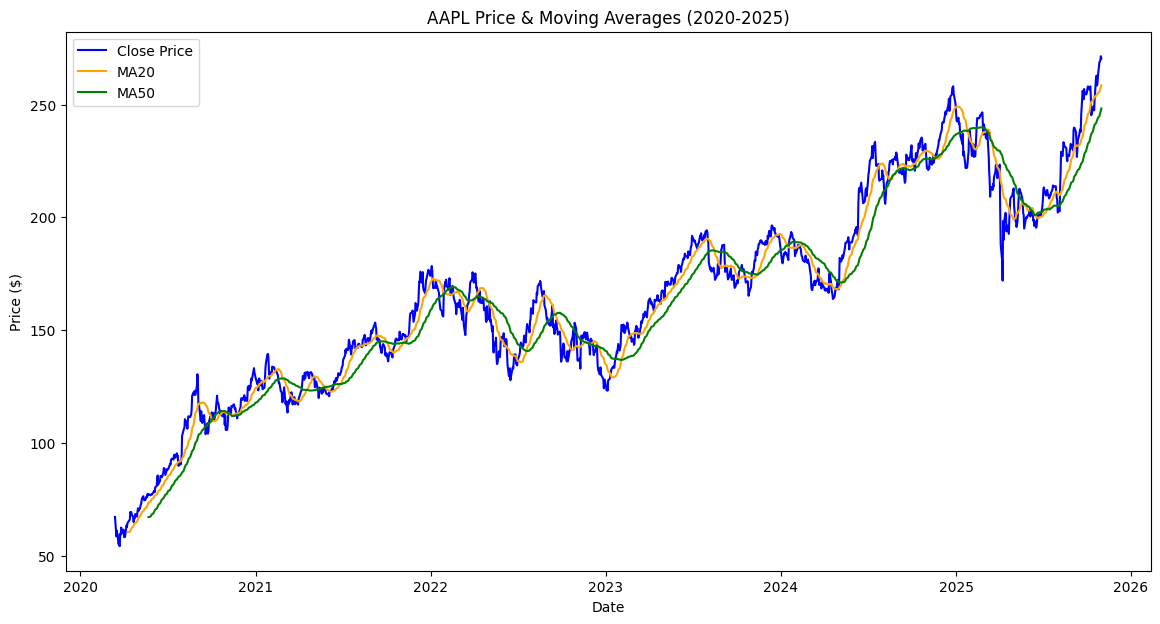

In [90]:
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['MA20'], label='MA20', color='orange')
plt.plot(df['MA50'], label='MA50', color='green')
plt.title("AAPL Price & Moving Averages (2020-2025)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()


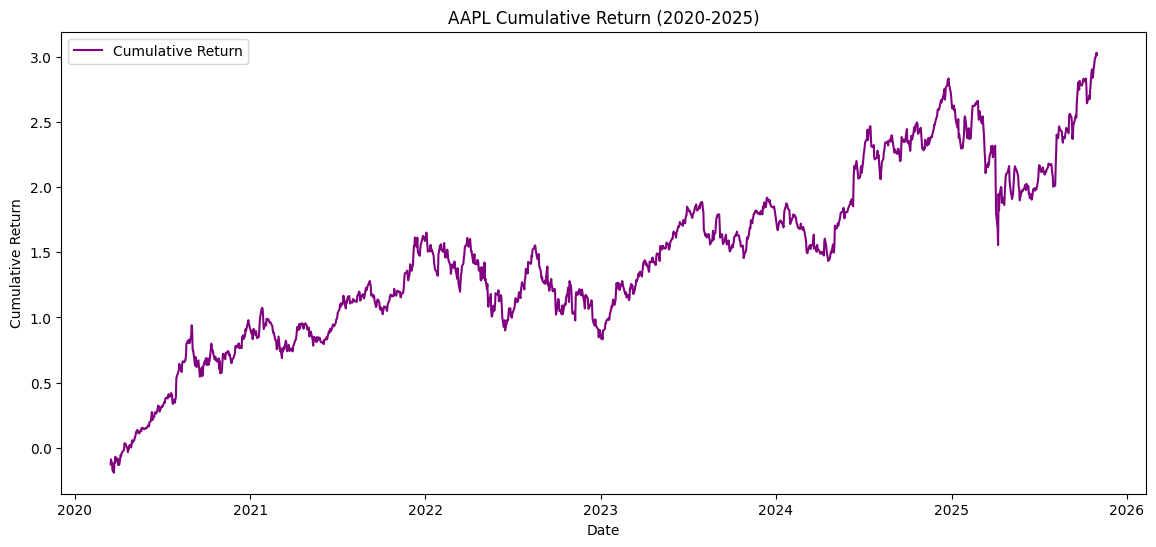

In [91]:
plt.figure(figsize=(14,6))
plt.plot(df['Cumulative Return'], label='Cumulative Return', color='purple')
plt.title("AAPL Cumulative Return (2020-2025)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()


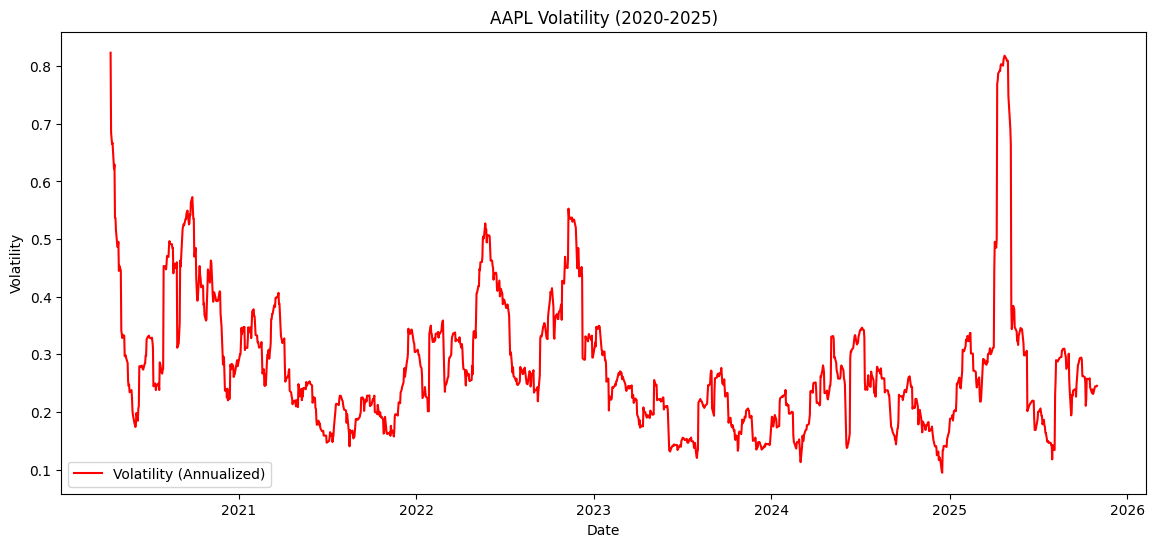

In [92]:
plt.figure(figsize=(14,6))
plt.plot(df['Volatility'], label='Volatility (Annualized)', color='red')
plt.title("AAPL Volatility (2020-2025)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


## Récapitulatif des Étapes

Voici un résumé des étapes que nous avons suivies dans ce notebook :

1.  **Installation des librairies nécessaires** : Installation de `pandas`, `requests`, `beautifulsoup4`, `yfinance`, et `lxml`.
2.  **Téléchargement des données avec yfinance** : Utilisation de `yfinance` pour télécharger les données historiques du ticker "AAPL" (et plus tard plusieurs tickers pour l'analyse de portfolio).
3.  **Nettoyage et préparation des données** : Chargement des données depuis un fichier CSV, conversion des colonnes en types numériques appropriés, gestion des valeurs manquantes et s'assurer que l'index est au format date.
4.  **Calcul des indicateurs financiers** : Calcul du rendement quotidien, du rendement cumulatif, des moyennes mobiles (MA20 et MA50), et de la volatilité annualisée pour le ticker "AAPL".
5.  **Analyse de Portfolio (pour plusieurs tickers)** : Calcul du rendement cumulé pour plusieurs actions, du rendement et de la volatilité du portfolio pondéré, et du ratio de Sharpe.
6.  **Visualisation des données** : Création de graphiques pour visualiser le prix de clôture et les moyennes mobiles, le rendement cumulatif, et la volatilité. Un heatmap de corrélation a également été généré pour l'analyse de portfolio.

